# Projet 05 : Segmentez des clients d'un site e-commerce

## Sommaire 

### Rappel de problématique
- Olist est un site de e-commerce au Brésil qui souhaite obtenir une segmentation de ses clients utilisable au quotidien par leur équipe marketing dans leurs campagnes de communication.
### Objectif
- L'objectif est de comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données personnelles anonymisées.
### Mission
- Fournir  description actionable de la segmentation et de sa logique sous-jacente pour une utilisation optimale. 
- Proposer un contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps. 

### Connaissance et Nettoyage du jeu de données 
 - Dimension de jeu de données
 - Les variables de jeux de données
 - Données manquantes 
 - Nettoyage du typage des données 

### Analyse exploiratoire de chaque frame

### Regroupement des dataframe

### Analyse exploiratoire de dataframe de modélisation

### Conclusion

In [1]:
#Importer les librairies

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import glob

from time import time
from statsmodels.tsa.seasonal import seasonal_decompose
from mpl_toolkits.basemap import Basemap

from datetime import datetime as dt
import datetime


from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import squarify

from sklearn.preprocessing import MinMaxScaler
 

from scipy.spatial.distance import cdist  

import plotly.graph_objects as go

In [2]:
# Set colors pour afficher
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Connaissance de jeu de données 

In [3]:
# Importer les datas 

customer = pd.read_csv(r"C:\Users\faeze\OneDrive\Documents\OC data science\PROJECT\Projet5\archive\olist_customers_dataset.csv")
geoloc = pd.read_csv(r"C:\Users\faeze\OneDrive\Documents\OC data science\PROJECT\Projet5\archive\olist_geolocation_dataset.csv")
item = pd.read_csv(r"C:\Users\faeze\OneDrive\Documents\OC data science\PROJECT\Projet5\archive\olist_order_items_dataset.csv")
payment= pd.read_csv(r"C:\Users\faeze\OneDrive\Documents\OC data science\PROJECT\Projet5\archive\olist_order_payments_dataset.csv")
review = pd.read_csv(r"C:\Users\faeze\OneDrive\Documents\OC data science\PROJECT\Projet5\archive\olist_order_reviews_dataset.csv")
order= pd.read_csv(r"C:\Users\faeze\OneDrive\Documents\OC data science\PROJECT\Projet5\archive\olist_orders_dataset.csv")
product = pd.read_csv(r"C:\Users\faeze\OneDrive\Documents\OC data science\PROJECT\Projet5\archive\olist_products_dataset.csv")
sellers = pd.read_csv(r"C:\Users\faeze\OneDrive\Documents\OC data science\PROJECT\Projet5\archive\olist_sellers_dataset.csv")
category= pd.read_csv(r"C:\Users\faeze\OneDrive\Documents\OC data science\PROJECT\Projet5\archive\product_category_name_translation.csv")

In [4]:
#Afficher les data frames

all_filles = [(customer, 'customer'),
       (sellers, 'sellers'),
       (review, 'reviews'), 
       (item, 'items'),
       (product, 'product'),
       (geoloc, 'geolocation'),
       (category, 'category'),
       (order, 'order'),
       (payment, 'payments')
      ]

for df, name in all_filles : 
    print('\n\n')
    print(color.BOLD + color.RED + 'Dataframe Title: ' + name.capitalize()  + color.END)
    display(df.head(3))




Dataframe Title: Customer


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP





Dataframe Title: Sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ





Dataframe Title: Reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24





Dataframe Title: Items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87





Dataframe Title: Product


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0





Dataframe Title: Geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP





Dataframe Title: Category


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto





Dataframe Title: Order


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00





Dataframe Title: Payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


### Dimension de jeu de données

In [5]:
# Afficher la dimenion de chaque dataframe

print(color.BOLD + "Dimension des dataframes" + color.END)
for df, name in all_filles:
    print('\n')
    print(color.BOLD + color.BLUE + name.capitalize()+ color.END)
    print(df.shape)

Dimension des dataframes


Customer
(99441, 5)


Sellers
(3095, 4)


Reviews
(99224, 7)


Items
(112650, 7)


Product
(32951, 9)


Geolocation
(1000163, 5)


Category
(71, 2)


Order
(99441, 8)


Payments
(103886, 5)


### Les variables de jeux de données

In [6]:
# Afficher les colonnes de chaque dataframe
for df, name in all_filles : 
    print('\n\n')
    print(color.BOLD + color.RED + 'Dataframe Title: ' + name.capitalize()  + color.END)
    display(df.columns.tolist())




Dataframe Title: Customer


['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state']




Dataframe Title: Sellers


['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']




Dataframe Title: Reviews


['review_id',
 'order_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp']




Dataframe Title: Items


['order_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value']




Dataframe Title: Product


['product_id',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']




Dataframe Title: Geolocation


['geolocation_zip_code_prefix',
 'geolocation_lat',
 'geolocation_lng',
 'geolocation_city',
 'geolocation_state']




Dataframe Title: Category


['product_category_name', 'product_category_name_english']




Dataframe Title: Order


['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']




Dataframe Title: Payments


['order_id',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value']

### Données manquantes

In [7]:
# Afficher le pourcentage des valeurs manquantes de chaque dataframe
for df, name in all_filles: 
    print('\n')
    print(color.BOLD +color.BLUE + name.capitalize() + color.END)
    print((df.isna().sum().sum()/df.shape[0])*100, 'NaN')



Customer
0.0 NaN


Sellers
0.0 NaN


Reviews
147.0440619205031 NaN


Items
0.0 NaN


Product
7.4292130739583015 NaN


Geolocation
0.0 NaN


Category
0.0 NaN


Order
4.935589947808248 NaN


Payments
0.0 NaN


### Aperçu sr les jeux de données ; typage, les valeurs uniques , .. 

In [121]:
liste_dfs = [customer, geoloc, item, payment, review, order, product, sellers, category]
name_df = ['customer', 'geoloc', 'item', 'payment', 
           'review', 'order', 'product', 'sellers', 'category']
for n in range(len(name_df)) : 
    name_df[n] = name_df[n].upper()

i=0
liste_indices = []
liste_colonnes = []
liste_types = []
liste_uniques = []
list_NaN = []

for df in liste_dfs:
    

    for column in df.columns:
        liste_indices.append(name_df[i]) 
        liste_colonnes.append(column)
        liste_types.append(df[column].dtype)
        liste_uniques.append(df[column].nunique())
        list_NaN.append(df[column].isna().sum())
    i+=1
resume_data = pd.DataFrame([liste_indices,
                            liste_colonnes, 
                            liste_types,
                            liste_uniques,
                            list_NaN]).T

resume_data.columns=['Donnee','Nom colonne', 'Type', 'Valeurs uniques',  'Nombre de NaN']
resume_data


### Bilan sur le résumé de jeux de données de site e-commerce brézilien 'Olisat'
- On 9 dataframes de dimension différentes. 
- Les dataframe contiennet les varaibles différentes : Customer_id, product_id, order_id, la date de commande et de livraison , la localisation de clients et des vendeurs...
- Afin de pouvoir ségmenter les client, on aura besoin de regrouper les dataframe et créer de nouveau variables comme la fréquence d'achat, panier_moyen , le moyenne note de chaqen clients .... 

### Nettoyage du typage des données 

In [9]:
#Afficher les varaibles de date_time de tous les dataframes 

date_type = resume_data.loc[(resume_data['Nom colonne'].str.contains('date') | resume_data['Nom colonne'].str.contains('time') )]

date_type

,Donnee,Nom colonne,Type,Valeurs uniques,Nombre de NaN
14,ITEM,shipping_limit_date,object,93318,0
27,REVIEW,review_creation_date,object,636,0
28,REVIEW,review_answer_timestamp,object,98248,0
32,ORDER,order_purchase_timestamp,object,98875,0
34,ORDER,order_delivered_carrier_date,object,81018,1783
35,ORDER,order_delivered_customer_date,object,95664,2965
36,ORDER,order_estimated_delivery_date,object,459,0


In [10]:
# Traitment des typage des données 

item['shipping_limit_date'] = pd.to_datetime(item[
        'shipping_limit_date'], errors='coerce')

review['review_creation_date'] = pd.to_datetime(review['review_creation_date'])

review['review_answer_timestamp'] = pd.to_datetime(review['review_answer_timestamp'])

order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])

order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'])

order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'])
 
order['order_estimated_delivery_date'] =  pd.to_datetime(order['order_estimated_delivery_date'])

order['order_approved_at'] = pd.to_datetime(order['order_approved_at'])

In [11]:
null_data = resume_data.loc[(resume_data['Nombre de NaN'] != 0)]
null_data

,Donnee,Nom colonne,Type,Valeurs uniques,Nombre de NaN
25,REVIEW,review_comment_title,object,4527,87656
26,REVIEW,review_comment_message,object,36159,58247
33,ORDER,order_approved_at,object,90733,160
34,ORDER,order_delivered_carrier_date,object,81018,1783
35,ORDER,order_delivered_customer_date,object,95664,2965
38,PRODUCT,product_category_name,object,73,610
39,PRODUCT,product_name_lenght,float64,66,610
40,PRODUCT,product_description_lenght,float64,2960,610
41,PRODUCT,product_photos_qty,float64,19,610
42,PRODUCT,product_weight_g,float64,2204,2


- On traitera les données manquantes après constituer le dataframe pour EDA 

# Analyse exploiratoire de chaque frame

## Customer 

In [12]:
print(color.BOLD + color.RED + 'Nombre de villes : ' + color.END,customer.customer_city.nunique())
print(color.BOLD + color.GREEN + 'Nombre des états : ' + color.END,customer.customer_state.nunique())

Nombre de villes :  4119
Nombre des états :  27


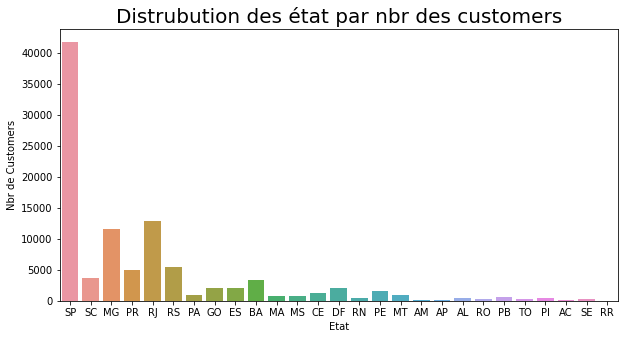

In [13]:
# Distribution des customers par état
plt.figure(figsize=(10,5))
sns.countplot(x='customer_state', data=customer)
plt.title('Distrubution des état par nbr des customers', fontsize = 20)
plt.xlabel('Etat')
plt.ylabel('Nbr de Customers')
plt.show()

## Item

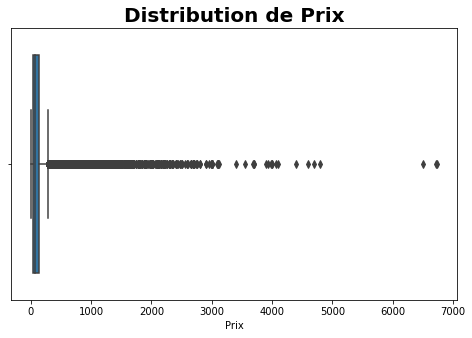

In [14]:
# La distribution du prix 
plt.figure(figsize=(8,5))
sns.boxplot(item['price'])
plt.title('Distribution de Prix' ,fontsize = 20 , weight='bold')
plt.xlabel('Prix')
plt.show()

In [15]:
df_total_value_prod = item.groupby('product_id').agg({'price': 'sum', 
                               'freight_value': 'sum'})
df_total_value_prod['total_value'] = df_total_value_prod['price'] + df_total_value_prod['freight_value']
df_total_value_prod["freight_ratio"] = (round(df_total_value_prod['freight_value']/ df_total_value_prod['total_value'],2))
df_total_value_prod = df_total_value_prod.reset_index()

In [16]:
df_total_value_prod['product_id'].nunique()

32951

## Product & Category

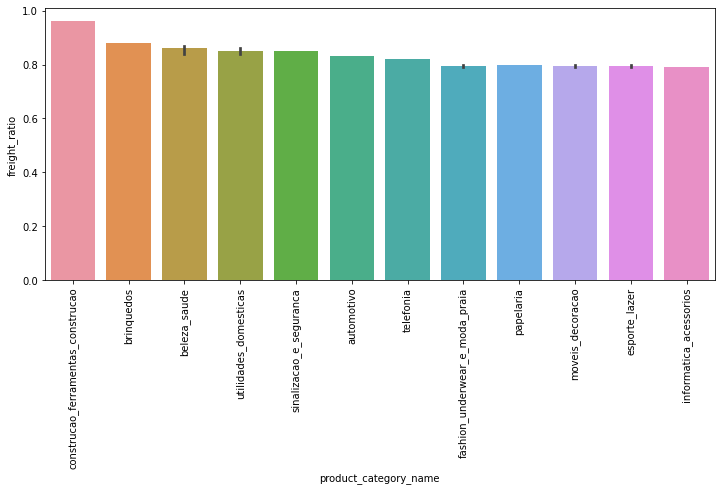

In [17]:
proud_price_df = pd.merge(product, df_total_value_prod, on  = 'product_id', how = 'inner')
proud_price_df_top20 = proud_price_df.sort_values(by = 'freight_ratio', ascending = False).head(20)
plt.figure(figsize = (12, 5))
sns.barplot( data = proud_price_df_top20, x= 'product_category_name', y = 'freight_ratio')
plt.xticks(rotation= 90, fontsize = 10)
plt.show()

In [18]:
# Merge des dataframe product & category 
product_new = pd.merge(product, category,
                    how="left",
                    on="product_category_name")



print("Nombre des categories de produits :" , product_new['product_category_name_english'].nunique())
top_category = pd.DataFrame(product_new['product_category_name_english'].value_counts()).reset_index()
top_category.rename(columns={'index': 'category','product_category_name_english': 'nmbr_category'},
                    inplace=True)
top15_cat = top_category.sort_values(by = 'nmbr_category', ascending = False).head(15)
top15_cat

Nombre des categories de produits : 71


,category,nmbr_category
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
5,auto,1900
6,computers_accessories,1639
7,toys,1411
8,watches_gifts,1329
9,telephony,1134


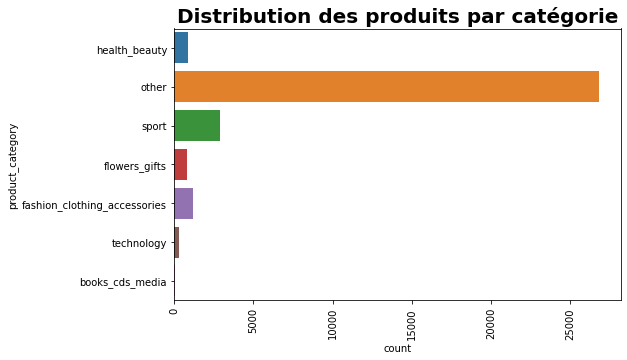

In [19]:
product_new['product_category'] = np.where((product_new['product_category_name'].str.contains("fashio|luggage")==True),
                                    'fashion_clothing_accessories',
                            np.where((product_new['product_category_name'].str.contains("health|beauty|perfum")==True),
                                     'health_beauty',
                            np.where((product_new['product_category_name'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                            np.where((product_new['product_category_name'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                            np.where((product_new['product_category_name'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                            np.where((product_new['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                            np.where((product_new['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                     'home_furniture',
                            np.where((product_new['product_category_name'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                            np.where((product_new['product_category_name'].str.contains("sport")==True),
                                     'sport',
                                     'other')))))))))

plt.figure(figsize=(8,5))
sns.countplot(data = product_new , y= 'product_category' )
plt.title('Distribution des produits par catégorie', fontsize= 20 , weight='bold')
plt.xticks(rotation= 90, fontsize = 10)
plt.show()

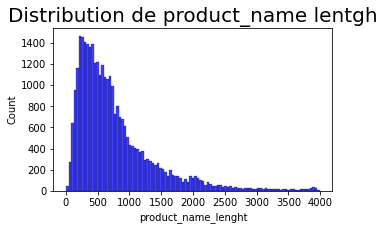

In [20]:
# La distribution du product_name lentgh
plt.figure(figsize=(5,3))
sns.histplot(x='product_description_lenght', data=product_new, color = 'blue')
plt.title('Distribution de product_name lentgh', fontsize = 20)
plt.xlabel('product_name_lenght')
plt.show()

Text(0.5, 0, 'Quantité de photo')

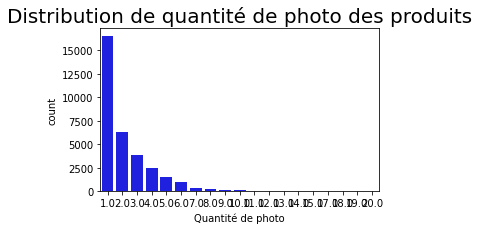

In [21]:
# Distribution de quantité de photo des produits
plt.figure(figsize=(5,3))
sns.countplot(x='product_photos_qty', data=product_new, color = 'blue')
plt.title('Distribution de quantité de photo des produits', fontsize= 20)
plt.xlabel('Quantité de photo')

## Payment 

In [22]:
print(color.BOLD + color.RED + 'Nbr de mode de payment : ' + color.END,payment['payment_type'].nunique())  

Nbr de mode de payment :  5


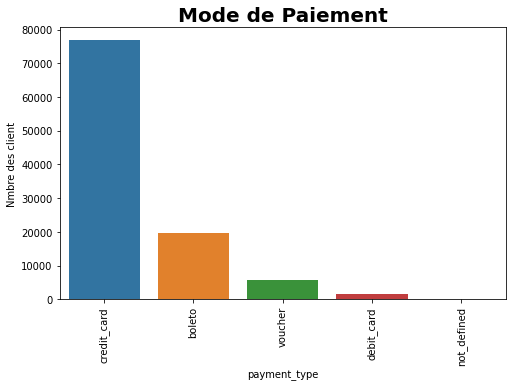

In [23]:
# Mode de paiement 
plt.figure(figsize=(8,5))
sns.countplot(x='payment_type', data=payment)
plt.title('Mode de Paiement', fontsize = 20 , weight='bold')
plt.xticks(rotation= 90, fontsize = 10)
plt.ylabel('Nmbre des client')
plt.show()

In [24]:
# Afficher le nbr de ligne avec 'type_payement == non définit'
print("Type_payment == non-défini : ", payment.loc[payment['payment_type']=='not_defined'].shape[0])

Type_payment == non-défini :  3


In [25]:
#Supprimer les lignes dont le mode de paiment n'est pas défini
payment_new = payment.loc[payment['payment_type']!='not_defined']

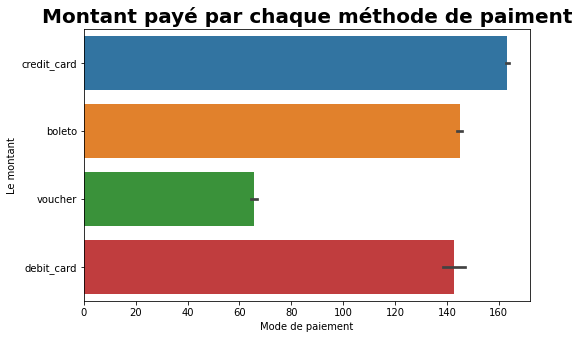

In [120]:
# Montant payé par mode de paiment 
plt.figure(figsize=(8,5))
sns.barplot(y='payment_type', x='payment_value', data=payment_new, ci=50)
plt.title('Montant payé par chaque méthode de paiment', fontsize = 20 , weight='bold')
plt.xlabel('Mode de paiement')
plt.ylabel('Le montant')
plt.show()

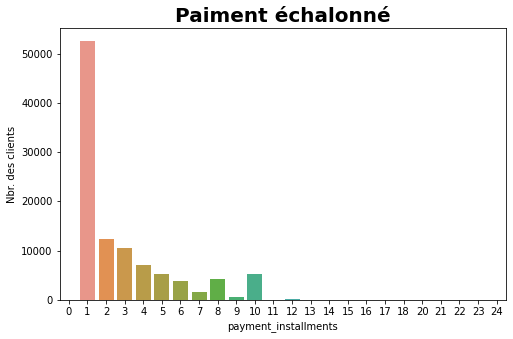

In [107]:
# Paiement echalonné 

# distrubution de nombre des paiment échelonnés
plt.figure(figsize=(8,5))
sns.countplot(x='payment_installments', data=payment_new)
plt.title('Paiment échalonné', fontsize = 20 , weight='bold')
#plt.xlabel('Payment Installments')
plt.ylabel('Nbr. des clients')
plt.show()

## Order

In [103]:
def plot_ts_decompose(decompose,figsize=(12,8)):

    fig, ax = plt.subplots(4,1,figsize=figsize)
    sns.lineplot(data=decompose.observed,x=decompose.observed.index,y=decompose.observed,ax=ax[0])
    sns.lineplot(data=decompose.trend,x=decompose.trend.index,y=decompose.trend,ax=ax[1])
    sns.lineplot(data=decompose.seasonal,x=decompose.seasonal.index,y=decompose.seasonal,ax=ax[2])
    sns.lineplot(data=decompose.resid,x=decompose.resid.index,y=decompose.resid,ax=ax[3])
    
    plt.tight_layout()

<Figure size 720x720 with 0 Axes>

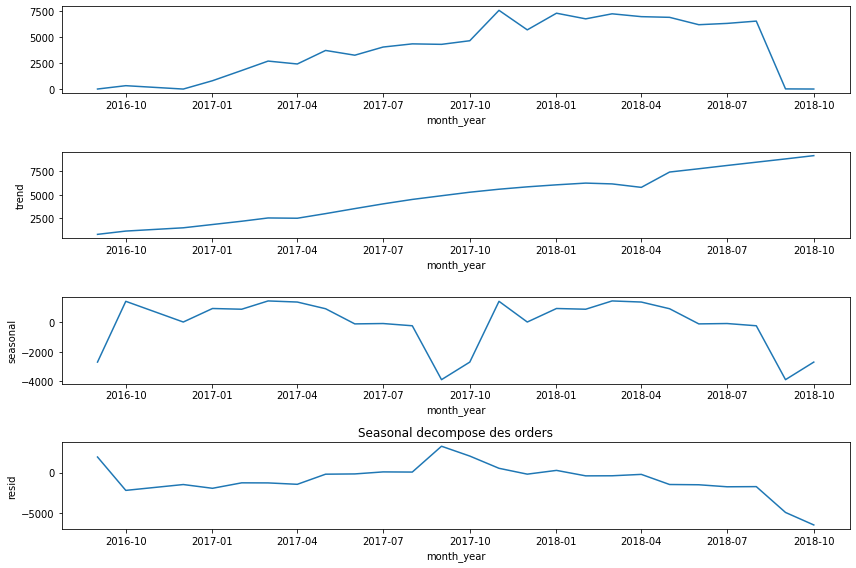

In [104]:
order['month_year'] = order['order_purchase_timestamp'].dt.to_period('M')
order['week_year'] = order['order_purchase_timestamp'].dt.to_period('W')
order_purchase_timestamp = order.groupby('month_year').size()
order_purchase_timestamp.index = order_purchase_timestamp.index.astype('datetime64[ns]')
plt.figure(figsize = (10,10))
decompose = seasonal_decompose(order_purchase_timestamp,model='additive', period=12, extrapolate_trend=12)
plot_ts_decompose(decompose)


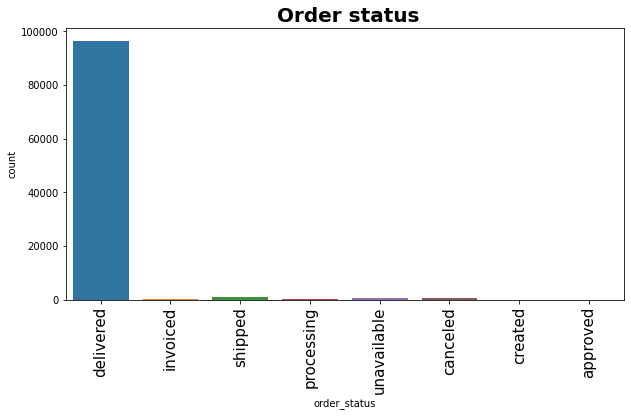

In [30]:
# Distribution de "order status"
plt.figure(figsize=(10,5))
sns.countplot(x='order_status', data=order)
plt.title(' Order status', fontsize = 20 , weight='bold')
plt.xticks(rotation= 90, fontsize = 15)
plt.show()

In [31]:
# Conserver uniquement les commandes livrés
order_new  = order.loc[(order['order_status']=="delivered")]
order_new.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
month_year                        0
week_year                         0
dtype: int64

In [32]:
order_new = order_new[~order_new["order_delivered_customer_date"].isna()]

In [33]:
order_new['command_approved'] = (order_new['order_approved_at'] - order_new['order_purchase_timestamp']).dt.seconds
order_new['delivery_days'] = (order_new['order_delivered_customer_date'] - order_new['order_purchase_timestamp']).dt.days
order_new['delivery_estimation'] = (order_new['order_estimated_delivery_date']-order_new['order_delivered_customer_date']).dt.days

In [34]:
print(str.format('Délais de moyenne de confirmation de commande: {:.2f} heurs', order_new['command_approved'].mean()/3600))
print(str.format('Délais de de moyenne de livraison de commande au client : {:.0f} days', order_new['delivery_days'].mean()))
print(str.format('Délais de moyenne de livraison actuelle et livraison estimée: {:.0f} days', order_new['delivery_estimation'].mean()))

Délais de moyenne de confirmation de commande: 3.93 heurs
Délais de de moyenne de livraison de commande au client : 12 days
Délais de moyenne de livraison actuelle et livraison estimée: 11 days


## Seller

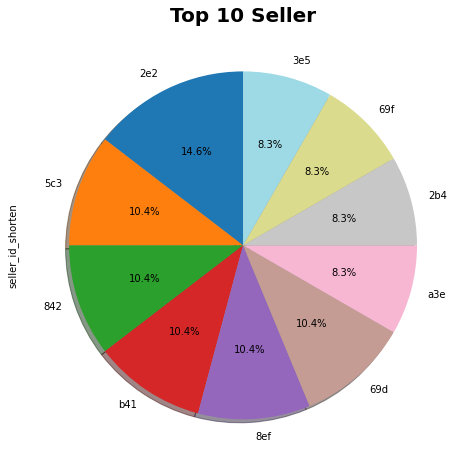

In [35]:
sellers['seller_id_shorten'] = sellers['seller_id'].str[-3:]
plt.figure(figsize=(8,8))
sellers['seller_id_shorten'].value_counts()[:10].plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, cmap='tab20')
plt.title("Top 10 Seller",size=20, weight='bold')
plt.show()

In [100]:
print("Nbre des état des vendeurs:",sellers['seller_state'].nunique())

seller_etat = sellers.groupby('seller_state').agg({"seller_id" : 'count'}).reset_index()

#Trier et afficher les top10 etats 
seller_etat = seller_etat.sort_values(by = "seller_id", ascending = False).head(10)

Nbre des état des vendeurs: 23


Text(0, 0.5, 'No. vendeurs')

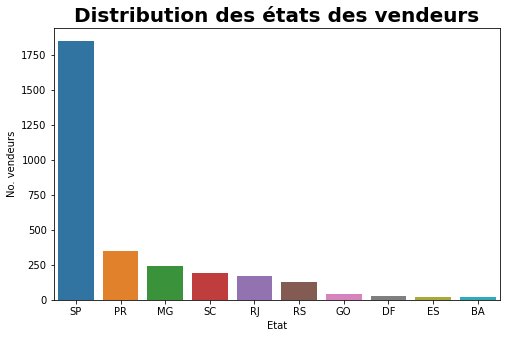

In [98]:


# plotting etats des vendeurs
plt.figure(figsize=(8,5))
sns.barplot(x='seller_state', y = 'seller_id',
              data= seller_etat)
plt.title('Distribution des états des vendeurs', fontsize = 20 , weight='bold')
plt.xlabel('Etat')
plt.ylabel('No. vendeurs')

## Review

In [37]:
# Supprimer les colonne dont on n'a pas besoin
review_new =  review.drop(columns=['review_comment_title', 'review_comment_message'])

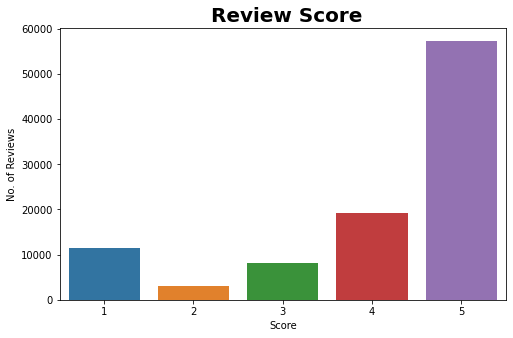

In [38]:
# Distribution de "review score"
plt.figure(figsize=(8,5))
sns.countplot(x='review_score', data=review)
plt.title(' Review Score', fontsize = 20 , weight='bold')
plt.xlabel('Score')
plt.ylabel('No. of Reviews')
plt.show()

## Geolocalisation

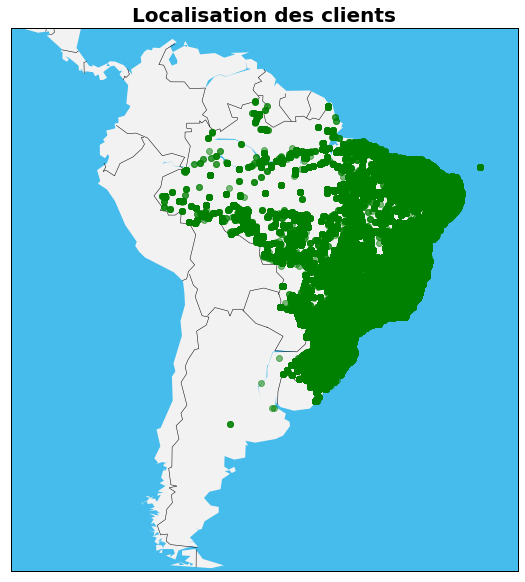

In [39]:
lat = geoloc['geolocation_lat']
lon = geoloc['geolocation_lng']

plt.figure(figsize=(10,10))

m = Basemap(llcrnrlat=-55.401805,llcrnrlon=-92.269176,urcrnrlat=13.884615,urcrnrlon=-27.581676)
m.bluemarble()
m.drawmapboundary(fill_color='#46bcec') # Make your map into any style you like
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec') # Make your map into any style you like
#m.drawcoastlines()
m.drawcountries()
m.scatter(lon, lat,zorder=10,alpha=0.5,color='green')
plt.title("Localisation des clients", fontsize = 20 , weight = 'bold')
plt.show()

In [40]:
# La période des orders 
start = order_new["order_purchase_timestamp"].min()
end = order_new["order_purchase_timestamp"].max()
print("La période complète des commandes _jours : ", end -start)

La période complète des commandes _jours :  713 days 02:43:59


- On a les donnée de presque 23 mois de septembre 2016 au septembre 2018

## Bilan sur EDA des dataframes 

- On a les client de 4119 villes et de 27 états en Brézil
- Délais moyen de confirmation de chaque commande est de 3.93 heurs.
- Délais moyen de livraison de commande au client est 12 days
- Délais moyen de livraison actuelle et livraison estimée est 11 days
- Les clients ont 4 mode de paiment.
- La période complète des commande est de 713 jours. 


In [41]:
# Supprimer les colonnes qui ne sont pas nécessiares
orders_new = order.drop(["order_approved_at",
                 "order_delivered_carrier_date", 
                 "order_estimated_delivery_date"],
                axis=1)
order_new = order_new[['order_id',
 'customer_id',
 'order_purchase_timestamp',
 'month_year',
 'week_year',
 'delivery_days',
 'delivery_estimation']]


item_new = item.drop(["seller_id",
                      "shipping_limit_date"],
                     axis=1)

product_new = product_new.drop([
'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_category_name_english'], axis= 1)

## Créer un dataframe pour la modelisation 

- On va regrouper les dataframe pour créer un df pour la modélisation

In [229]:
# Regroupement des datas 

df =  pd.merge(order_new ,review_new, on='order_id', how='inner')

df = pd.merge(df, payment_new, on='order_id', how='inner')

df = pd.merge(df,item_new, on = 'order_id', how = 'inner')

df = pd.merge(df,product_new, on = 'product_id', how = 'inner')

#df = df.merge(sellers, on = 'seller_id', how= 'inner')

df= pd.merge(df,customer, on = 'customer_id', how= 'inner')

#df= df.merge(geoloc, left_on='customer_zip_code_prefix', 
#                      right_on='geolocation_zip_code_prefix', how='inner')

## Feuture engineering 

In [230]:
df['year'] = pd.DatetimeIndex(df['order_purchase_timestamp']).year
df['month'] = pd.DatetimeIndex(df['order_purchase_timestamp']).month

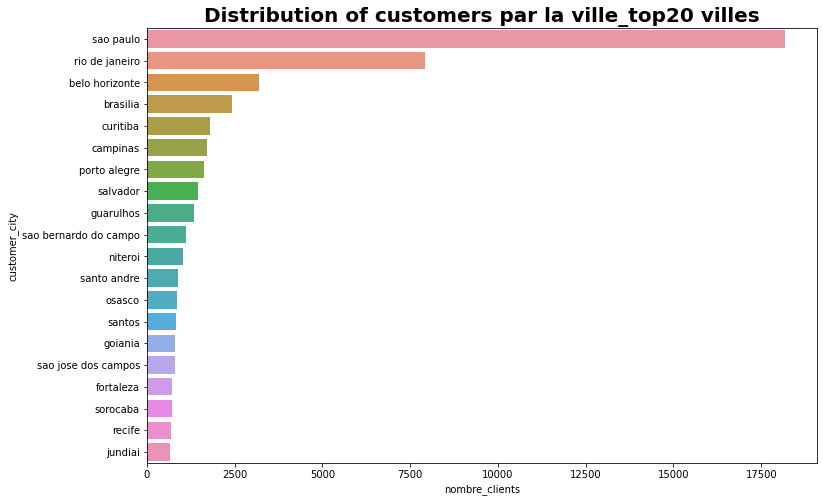

In [124]:
# Distribution of customers by city of Brazil
distribution_ville = df[['customer_unique_id', 'customer_city']].groupby(['customer_city']).agg('count').reset_index()
distribution_ville.rename(columns={'customer_unique_id': 'nombre_clients'},
                    inplace=True)

top20_ville = distribution_ville.sort_values(by = 'nombre_clients', ascending = False).head(20)


plt.figure(figsize=(12,8))
sns.barplot(data = top20_ville, x= 'nombre_clients', y ='customer_city')
plt.title('Distribution of customers par la ville_top20 villes', fontsize = 20, weight = 'bold')
plt.show()

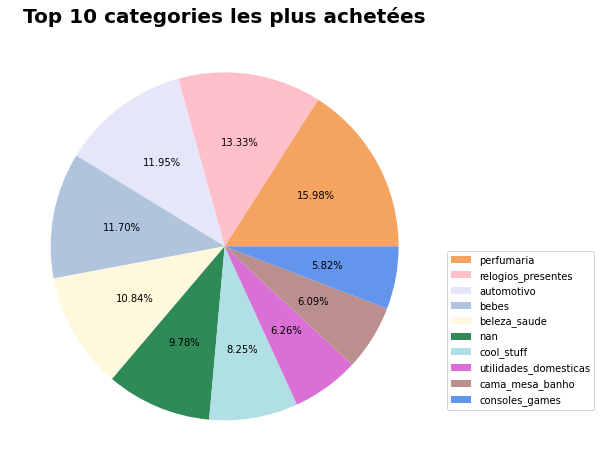

In [235]:
# Les Categorie les plus achetés 
top_cat = df.sort_values(
        ['customer_unique_id','product_category_name'], ascending=False).groupby(
        ['customer_unique_id','product_category_name']).head(1)[[
        'customer_unique_id', 'product_category_name']]
top_cat.columns = ['customer_unique_id', 'top_cat_achetee']
top_cat.set_index('customer_unique_id', inplace=True)
labels  = top_cat['top_cat_achetee'].unique()


# Piechart des catégorie de produits les plus achetées 
category_achetee = df[['customer_unique_id', 'product_category_name']].groupby(['product_category_name']).agg('count').reset_index()
category_achetee.rename(columns={'customer_unique_id': 'nmbr_category'},
                    inplace=True)

top10_category_achetee  = category_achetee.sort_values(by = 'nmbr_category', ascending = False).head(10)

#Plot top categorie achete par client
palette = ["#F4A460",  "#FFC0CB", "#E6E6FA", "#B0C4DE", "#FFF8DC",
           "#2E8B57", "#B0E0E6", "#DA70D6", "#BC8F8F", "#6495ED"]
plt.figure(figsize=(8,8))
plt.pie(top10_category_achetee['nmbr_category'], autopct='%1.2f%%', colors= palette)
plt.title("Top 10 categories les plus achetées",size=20, weight='bold')
plt.legend(labels, bbox_to_anchor=(1,0.5), loc="best", fontsize= 10)
#plt.axis("off")
plt.show()

In [233]:
max_date = max(df['order_purchase_timestamp']) + datetime.timedelta(days=1)

order_items_pay = df.groupby('customer_unique_id')\
.agg({'payment_value':sum,
      'delivery_days': 'mean', 
     'payment_installments' : 'mean', 
      'month' :'max', 
      'year': 'max', 
      'month_year' :'max',
      'order_id' : lambda x: x.nunique(), 
      'review_score' : 'mean', 
      "order_purchase_timestamp": lambda x: (max_date - x.max()).days,
       "order_item_id": lambda x: x.nunique(), 
      'product_id':'count', 
      'product_category_name':'count'
       }).reset_index()

order_items_pay = order_items_pay.rename(columns={
                               'payment_value' : 'total_montant', 
                               'review_score': 'Note_Moy_Com',
                               'product_id': 'Nbr_produits', 
                                'order_purchase_timestamp': 'recence', 
                                'order_id' : 'frequence', 
                                'order_purchase_timestamp': 'recence', 
                                'order_item_id' : 'nbr_commande', 
                                'product_category_name':'nmbr_category'})             

order_items_pay['panier_moyen'] = order_items_pay['total_montant'] / order_items_pay['frequence']

In [234]:
order_items_pay

,customer_unique_id,total_montant,delivery_days,payment_installments,month,year,month_year,frequence,Note_Moy_Com,recence,nbr_commande,Nbr_produits,nmbr_category,panier_moyen
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,6.0,8.0,5,2018,2018-05,1,5.0,112,1,1,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,3.0,1.0,5,2018,2018-05,1,4.0,115,1,1,1,27.19
2,0000f46a3911fa3c0805444483337064,86.22,25.0,8.0,3,2017,2017-03,1,3.0,537,1,1,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,20.0,4.0,10,2017,2017-10,1,4.0,321,1,1,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89,13.0,6.0,11,2017,2017-11,1,5.0,288,1,1,1,196.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92741,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84,27.0,10.0,6,2017,2017-06,1,5.0,447,2,2,2,4134.84
92742,fffea47cd6d3cc0a88bd621562a9d061,84.58,30.0,1.0,12,2017,2017-12,1,4.0,262,1,1,1,84.58
92743,ffff371b4d645b6ecea244b27531430a,112.46,14.0,1.0,2,2017,2017-02,1,5.0,568,1,1,1,112.46
92744,ffff5962728ec6157033ef9805bacc48,133.69,11.0,5.0,5,2018,2018-05,1,5.0,119,1,1,1,133.69


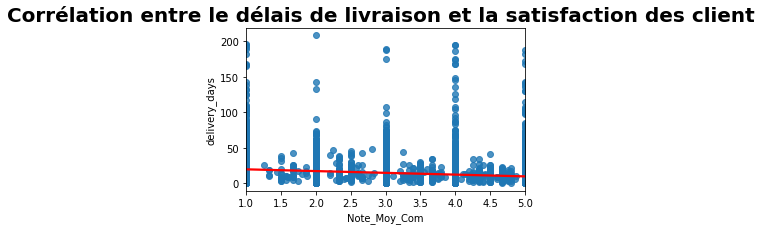

In [215]:
plt.figure(figsize=(5,3))
sns.regplot(data= order_items_pay, y = 'delivery_days', x = 'Note_Moy_Com' ,line_kws={"color": "red"})
plt.suptitle('Corrélation entre le délais de livraison et la satisfaction des client', fontsize = 20, weight = 'bold')
plt.show()


In [225]:

print("Pourcentage des client avec fréquence d'achat> 1 : ", ((order_items_pay[order_items_pay['frequence']>1].shape[0])/order_items_pay.shape[0])*100)


Pourcentage des client avec fréquence d'achat> 1 :  2.980182433743773


In [228]:
rfm_df = order_items_pay.copy()

# Analyse descriptive de RFM dataframe

In [241]:
rfm_df[['delivery_days', 'payment_installments', 'frequence', 'Note_Moy_Com', 'recence', 'panier_moyen']].describe()

,delivery_days,payment_installments,frequence,Note_Moy_Com,recence,panier_moyen
count,92746.000000,92746.000000,92746.000000,92746.000000,92746.000000,92746.000000
mean,12.060600,2.898307,1.033177,4.153367,237.798245,204.376237
std,9.466231,2.675020,0.208425,1.280530,152.591525,603.916800
min,0.000000,0.000000,1.000000,1.000000,1.000000,9.590000
25%,6.000000,1.000000,1.000000,4.000000,114.000000,63.150000
50%,10.000000,2.000000,1.000000,5.000000,219.000000,110.700000
75%,15.000000,4.000000,1.000000,5.000000,346.000000,195.690000
max,208.000000,24.000000,15.000000,5.000000,695.000000,109312.640000


### Bilan sur l'analyse exploiratoire des RFM data :

- Le délai moyen de livraison est de 12 jours 
- La moyenne de recence de consulter le site est de 238 jour



In [237]:
#Exporter le dataframe pour la modélisation 
rfm_df.to_csv('rfm_df.csv')

## Conclusion 
- On a effectué une analyse exploiratoire des jeux de donnée contenant plusieurs informations sur les client de site e-commerce Olisat. 
- Seulement 3 % des clients ont réalisé plusieurs achats
- La fréquence d'achat et la récence de consulter le site de e-commerce montre que les clients font des achats très spécifiques.

# Fin de notebook de EDA